# تحليل وصفي للعقار في منطقة الرياض
- في هذا التحليل سوف اعمل تنظيف وتنقيح للبيانات وحذف البيانات الغير مرغوب فيها 
- تحليل وصفي للعقار في الرياض بشكل عام 
- سوف أجيب على بعض الاسئلة مثل: 
- أسعار الفلل الدوبلكس وغير الدوبلكس في منطقه الرياض 

## Data Wrangling & Cleaning
- Droping unnacceray columns and data. 
- Droping the paid because I don't have an explaination for the column.
- Droping the price and area where the valuse equal to zero.

In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option("display.max_columns", 100)

In [73]:
df = pd.read_csv('train.csv')

In [74]:
df.head()

,creation_datetime,updated_at,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,family_or_single,furnished,num_living_rooms,maid_room,price_per_meter,advertiser_type,pool,paid,price,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,region_name_en,nearest_city_name_en,district_name_en
0,2016-03-04 13:49:48,2016-06-02 07:07:34,0,1,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,2,لا يوجد غرفة خادمة,0,مسوق,لا يوجد مسبح,مجاني,1250000,غير محدد,0,297,شمال,15,للبيع,5,24.8402,46.7528,Riyadh,AR RIYADH,Al Munsiyah
1,2016-02-21 23:35:44,2016-02-25 12:19:14,0,0,0,0,0,مغلق,سكني,أرض,لا يوجد غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,0,لا يوجد غرفة خادمة,1000,مالك,لا يوجد مسبح,مجاني,450000,غير محدد,0,450,شمال,20,للبيع,0,24.6175,46.5280,Riyadh,UBAYR,Dhahrat Laban
2,2016-01-05 21:26:47,2016-03-05 18:25:43,0,0,5,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,1,غرفة خادمة,0,مسوق,مسبح,مجاني,4500000,غير محدد,0,750,شرق,20,للبيع,5,24.8131,46.5991,Riyadh,AL WUSAYL,Al Malqa
3,2016-02-04 09:29:46,2016-02-04 09:29:58,0,0,1,0,1,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,1,لا يوجد غرفة خادمة,0,مسوق,لا يوجد مسبح,مجاني,100000,غير محدد,0,500,شمال,5,للبيع,1,24.6738,46.7369,Riyadh,AR RIYADH,Al Malaz
4,2016-03-28 13:22:12,2016-05-31 16:37:40,4,0,3,2,1,مغلق,غير محدد,شقة,لا يوجد غرفة سائق,ليست دوبلكس,عوائل,لا يوجد اثاث,1,لا يوجد غرفة خادمة,205,مسوق,لا يوجد مسبح,مجاني,35000,سنوي,0,0,شمال غربي,35,للإيجار,3,24.8279,46.6451,Riyadh,AD DIR'IYAH,Al Yasmin


In [75]:
# droping the necessary data.

# بما أن جميع البيانات متعلقه في منطقة الرياض. يفضل اننا نحذف المنطقه والمدينه لعدم الحاجة لها

df.drop(['creation_datetime', 'updated_at', 'region_name_en', 'paid'],
                   axis=1,inplace=True)

df.head()

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,family_or_single,furnished,num_living_rooms,maid_room,price_per_meter,advertiser_type,pool,price,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,nearest_city_name_en,district_name_en
0,0,1,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,2,لا يوجد غرفة خادمة,0,مسوق,لا يوجد مسبح,1250000,غير محدد,0,297,شمال,15,للبيع,5,24.8402,46.7528,AR RIYADH,Al Munsiyah
1,0,0,0,0,0,مغلق,سكني,أرض,لا يوجد غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,0,لا يوجد غرفة خادمة,1000,مالك,لا يوجد مسبح,450000,غير محدد,0,450,شمال,20,للبيع,0,24.6175,46.5280,UBAYR,Dhahrat Laban
2,0,0,5,0,1,مغلق,غير محدد,فيلا,غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,1,غرفة خادمة,0,مسوق,مسبح,4500000,غير محدد,0,750,شرق,20,للبيع,5,24.8131,46.5991,AL WUSAYL,Al Malqa
3,0,0,1,0,1,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,ليست دوبلكس,عزاب,لا يوجد اثاث,1,لا يوجد غرفة خادمة,0,مسوق,لا يوجد مسبح,100000,غير محدد,0,500,شمال,5,للبيع,1,24.6738,46.7369,AR RIYADH,Al Malaz
4,4,0,3,2,1,مغلق,غير محدد,شقة,لا يوجد غرفة سائق,ليست دوبلكس,عوائل,لا يوجد اثاث,1,لا يوجد غرفة خادمة,205,مسوق,لا يوجد مسبح,35000,سنوي,0,0,شمال غربي,35,للإيجار,3,24.8279,46.6451,AD DIR'IYAH,Al Yasmin


In [76]:
# البحث في بعض القيم التي قيمتها صفر

# بعض العقارات لاتملك قيمه للمتر الواحد ولكن تملك قيمه شامله للعقار. يفضل حذف العقارات التي لا تملك اي قيمه 

# كذلك يفضل حذف العقارات التي لا تملك مساحه. عشان يكون التحليل اكثر دقة و وضوح.
df.isin([0]).sum()

age_less_than                54652
num_apartments               63400
num_bedrooms                 25591
floor_num                    59713
num_kitchens                 38531
closed                           0
commercial_or_residential        0
property_type                    0
driver_room                      0
duplex                           0
family_or_single                 0
furnished                        0
num_living_rooms             28187
maid_room                        0
price_per_meter              61860
advertiser_type                  0
pool                             0
price                            2
rent_period                      0
num_rooms                    77545
area                         17302
street_direction                 0
street_width                 25089
for_rent_or_sale                 0
num_water_cycles             25201
Latitude                         0
Longitude                        0
nearest_city_name_en             0
district_name_en    

In [77]:

df.drop(df.loc[df['price']==0].index, inplace=True)
df.drop(df.loc[df['area']==0].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62671 entries, 0 to 79973
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age_less_than              62671 non-null  int64  
 1   num_apartments             62671 non-null  int64  
 2   num_bedrooms               62671 non-null  int64  
 3   floor_num                  62671 non-null  int64  
 4   num_kitchens               62671 non-null  int64  
 5   closed                     62671 non-null  object 
 6   commercial_or_residential  62671 non-null  object 
 7   property_type              62671 non-null  object 
 8   driver_room                62671 non-null  object 
 9   duplex                     62671 non-null  object 
 10  family_or_single           62671 non-null  object 
 11  furnished                  62671 non-null  object 
 12  num_living_rooms           62671 non-null  int64  
 13  maid_room                  62671 non-null  obj

In [78]:
df.isin([0]).sum()

age_less_than                45572
num_apartments               46568
num_bedrooms                 25276
floor_num                    56349
num_kitchens                 34043
closed                           0
commercial_or_residential        0
property_type                    0
driver_room                      0
duplex                           0
family_or_single                 0
furnished                        0
num_living_rooms             26286
maid_room                        0
price_per_meter              44635
advertiser_type                  0
pool                             0
price                            0
rent_period                      0
num_rooms                    60324
area                             0
street_direction                 0
street_width                  8923
for_rent_or_sale                 0
num_water_cycles             24887
Latitude                         0
Longitude                        0
nearest_city_name_en             0
district_name_en    

## Descriptive analysis 

In [79]:
df.property_type.unique()

array(['فيلا', 'أرض', 'استراحة', 'عمارة', 'شقة', 'دور', 'محل', 'مزرعة',
       'مكتب تجاري', 'بيت', 'مستودع', 'قصر', 'مخيم', 'غرفة'], dtype=object)

In [84]:
df.nearest_city_name_en.unique()

array(['AR RIYADH', 'UBAYR', 'AL WUSAYL', 'KAHF BARMAH', "AD DIR'IYAH",
       "AL 'AMMAJ", 'SULBUKH', 'BANBAN', "'IRQAH", 'LABAN', 'IBN GHANNAM',
       'ABA AL KIBASH', 'AL HAIR', "AL 'AMMARIYAH", 'AL GHANAMIYAH',
       'AL JUBAYLAH', "AR RUFAI'", 'AL MAGHRAFIYAH', 'QASR AL QURAYNAH',
       nan, "AR RUFA'", 'QASR IBN SHUHAYL', 'HIT', 'AL MUZAHIMIYAH',
       'QASR FAYHAQ', 'QUSUR AL MUQBIL', 'AL UYAINAH', 'AL FAYDAH',
       'BAWDAH', 'AL BARRAH', 'MALHAM', 'ATH THUMAMAH', "KHASHM MI'DAD",
       'AL BUWAYB', 'AL AWSAT', 'HIZWA'], dtype=object)

In [103]:
# أحفظ قيم الفلل التي في مدينة الرياض والتي خارجها 

fellah = df[df.property_type == 'فيلا']
ar_riyadh = fellah[fellah.nearest_city_name_en =='AR RIYADH']
not_ar_riyadh= fellah[fellah.nearest_city_name_en !='AR RIYADH']


# متوسط أسعار الفلل في الرياض وخارجها


1926695571.9940298
265558707.23444197


In [80]:
df.duplex.count()

62671

In [81]:
sns.barplot(x="price", y="pri", data=tips)

,age_less_than,num_apartments,num_bedrooms,floor_num,num_kitchens,closed,commercial_or_residential,property_type,driver_room,duplex,family_or_single,furnished,num_living_rooms,maid_room,price_per_meter,advertiser_type,pool,price,rent_period,num_rooms,area,street_direction,street_width,for_rent_or_sale,num_water_cycles,Latitude,Longitude,nearest_city_name_en,district_name_en
70,2,0,4,0,1,متاح,غير محدد,فيلا,غرفة سائق,دوبلكس,عزاب,لا يوجد اثاث,0,غرفة خادمة,0,مسوق,لا يوجد مسبح,950000,غير محدد,0,250,شمال,20,للبيع,3,24.8189,46.7610,AR RIYADH,Al Munsiyah
100,0,4,5,0,1,متاح,سكني,فيلا,غرفة سائق,دوبلكس,عزاب,مؤثثة,2,غرفة خادمة,0,مسوق,لا يوجد مسبح,4000000,يومي,0,675,جنوب,35,للبيع,5,24.8296,46.7294,AR RIYADH,Qurtubah
173,0,0,5,0,1,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,دوبلكس,عزاب,لا يوجد اثاث,3,غرفة خادمة,0,مسوق,لا يوجد مسبح,900000,غير محدد,0,213,جنوب,20,للبيع,5,24.6343,46.5715,'IRQAH,Dhahrat Laban
283,5,0,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,دوبلكس,عزاب,لا يوجد اثاث,1,غرفة خادمة,0,مسوق,لا يوجد مسبح,1000000,غير محدد,0,250,غرب,15,للبيع,3,24.8143,46.6394,AD DIR'IYAH,As Sahafah
292,0,0,4,0,1,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,دوبلكس,عزاب,لا يوجد اثاث,3,غرفة خادمة,0,مسوق,لا يوجد مسبح,650000,غير محدد,0,200,غرب,20,للبيع,5,24.6090,46.4937,UBAYR,Dhahrat Laban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79669,0,0,5,0,0,مغلق,غير محدد,فيلا,غرفة سائق,دوبلكس,عزاب,لا يوجد اثاث,2,غرفة خادمة,0,مسوق,لا يوجد مسبح,1050000,غير محدد,0,250,شرق,20,للبيع,5,24.8829,46.6250,AL WUSAYL,Al Arid
79710,2,0,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,دوبلكس,عزاب,مؤثثة,1,لا يوجد غرفة خادمة,0,مالك,لا يوجد مسبح,180000,سنوي,0,230,غرب,15,للإيجار,3,24.7677,46.5742,AD DIR'IYAH,Al Khalidiyah
79748,3,0,4,0,1,مغلق,غير محدد,فيلا,غرفة سائق,دوبلكس,عزاب,مؤثثة,4,غرفة خادمة,0,مسوق,لا يوجد مسبح,85000,سنوي,0,250,جنوب,15,للإيجار,5,24.8297,46.6437,AD DIR'IYAH,Al Yasmin
79799,0,0,4,0,1,مغلق,غير محدد,فيلا,لا يوجد غرفة سائق,دوبلكس,عزاب,لا يوجد اثاث,1,غرفة خادمة,0,مسوق,لا يوجد مسبح,930000,غير محدد,0,312,غرب,20,للبيع,5,24.5600,46.5520,UBAYR,Tuwaiq


<AxesSubplot:xlabel='duplex'>

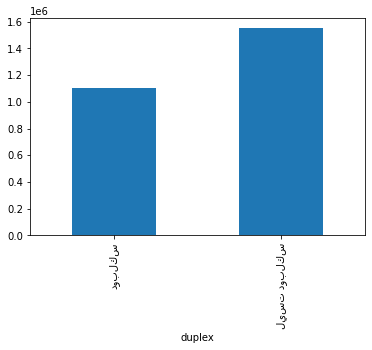

In [105]:
df_duplex = ar_riyadh.groupby(['duplex'])['price'].median()

df_duplex.plot.bar()

<AxesSubplot:xlabel='duplex'>

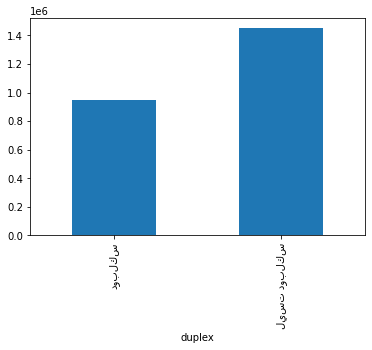

In [109]:
df_duplex_not_r = not_ar_riyadh.groupby(['duplex'])['price'].median()
df_duplex_not_r.plot.bar()

### Observations

- من الواضح ان الفلل في منطقة الرياض اغلى بشكل بسيط عن الفلل التي تقع حول مدينة الرياض
- متوسط أسعار الفلل داخل الرياض : 1500000 متوسط أسعار الدوبلكس: 1100000
- متوسط أسعار الفلل خارج الرياض: 1400000 متوسط أسعار الدوبلكس خارج الرياض: 900000 
